# Test Tensorflow
- 仮想環境を立てて初めの確認

In [3]:
from tensorflow.python.client import device_lib
import tensorflow as tf
import platform
import psutil
import matplotlib.pyplot as plt
import time

In [4]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 130525132034810679
 xla_global_id: -1,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 3643801600
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10708251836371247238
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
 xla_global_id: 416903419]

In [5]:
print(tf.__version__)

2.10.1


In [6]:
print(platform.processor())

Intel64 Family 6 Model 154 Stepping 3, GenuineIntel


In [7]:
psutil.virtual_memory()

svmem(total=34056757248, available=20759027712, percent=39.0, used=13297729536, free=20759027712)

In [8]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [9]:
y_train[:25]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1], dtype=uint8)

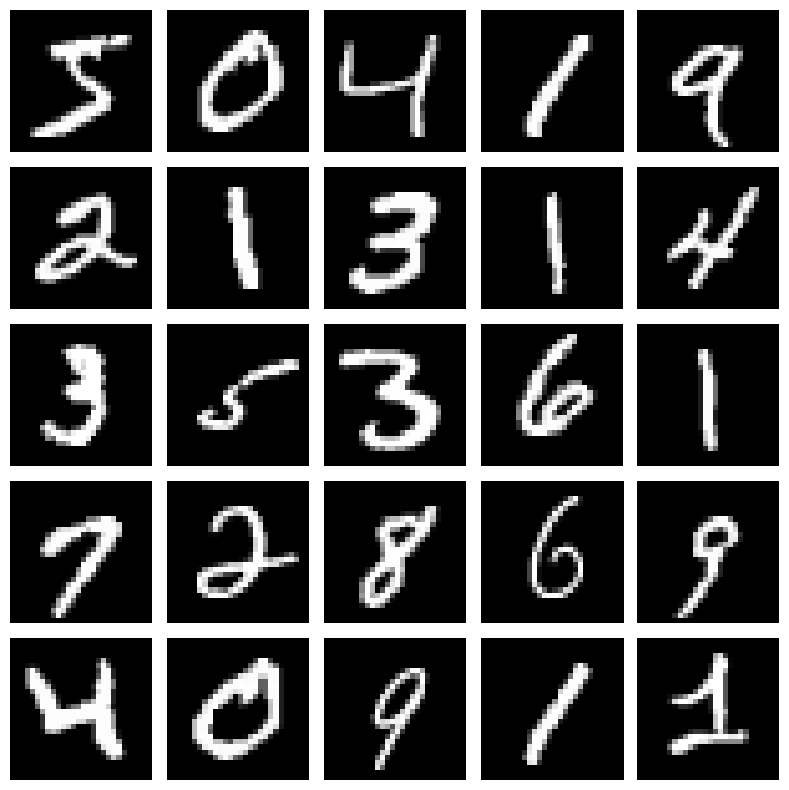

In [10]:
fig, axs = plt.subplots(5,5,figsize=(8,8))
axs = axs.flatten()

for img, ax in zip(x_train[:25], axs):
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    
plt.tight_layout()
plt.show()

In [11]:
# モデルの定義
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

# 損失関数とオプティマイザの定義
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

# CPUでの学習
start_time = time.time()
with tf.device('/CPU:0'):
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
end_time = time.time()
print("CPU time:", end_time - start_time)

# GPUでの学習
start_time = time.time()
with tf.device('/GPU:0'):
    model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))
end_time = time.time()
print("GPU time:", end_time - start_time)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.6323 - accuracy: 0.7656 - val_loss: 0.7777 - val_accuracy: 0.8623
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5755 - accuracy: 0.8542 - val_loss: 0.3949 - val_accuracy: 0.9135
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4791 - accuracy: 0.8761 - val_loss: 0.3460 - val_accuracy: 0.9136
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4374 - accuracy: 0.8900 - val_loss: 0.3025 - val_accuracy: 0.9265
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3899 - accuracy: 0.9011 - val_loss: 0.3036 - val_accuracy: 0.9305
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3670 - accuracy: 0.9081 - val_loss: 0.2830 - val_accuracy: 0.9354
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3400 - accuracy: 0.9143 - val_loss: 0.3746 - val_accuracy: